In [1]:
import pandas as pd
import glob
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

directoryPath = os.path.join('results_synthetic_reg/')

final_results = pd.DataFrame()
for file_name in glob.glob(directoryPath+'*.csv'):
    file = pd.read_csv(file_name, low_memory=False)
    final_results = pd.concat([final_results,file], axis=0)


sigma_arr = np.unique(final_results['sigma'])
n = len(np.unique(final_results['seed']))
final_results_sigma01 = final_results[final_results['sigma']==0.1]
final_results_sigma001 = final_results[final_results['sigma']==0.01]
final_results_sigma0 = final_results[final_results['sigma']==0]

final_results_mean = final_results.groupby('sigma').mean()
final_results_std = final_results.groupby('sigma').std()/np.sqrt(n)
final_results
# final_results.to_csv('final_results.csv')

,coverage,length,Noise type train,Noise type calib,calib,sigma,seed
0,90.94,1.772873,clean,t,noisy,0.0,31.0
1,90.94,1.772873,clean,gaussian,noisy,0.0,31.0
2,90.94,1.772873,clean,gumbel,noisy,0.0,31.0
3,90.94,1.772873,clean,positive,noisy,0.0,31.0
4,68.52,1.554041,clean,contractive,noisy,0.0,31.0
...,...,...,...,...,...,...,...
11,75.12,9.753855,positive,positive,noisy,1.0,49.0
12,73.36,1.341597,contractive,contractive,noisy,1.0,49.0
13,89.78,1.555326,contractive,clean,clean,1.0,49.0
14,94.86,2.231771,dispersive,dispersive,noisy,1.0,49.0


In [2]:
final_results_t = final_results[(final_results['Noise type train']=='clean')&(final_results['Noise type calib']=='t')]
final_results_t_mean = final_results_t.groupby('sigma').mean()
final_results_t_std = final_results_t.groupby('sigma').std()/np.sqrt(n)

final_results_gaussian = final_results[(final_results['Noise type train']=='clean')&(final_results['Noise type calib']=='gaussian')]
final_results_gaussian_mean = final_results_gaussian.groupby('sigma').mean()
final_results_gaussian_std = final_results_gaussian.groupby('sigma').std()/np.sqrt(n)

final_results_gumbel = final_results[(final_results['Noise type train']=='clean')&(final_results['Noise type calib']=='gumbel')]
final_results_gumbel_mean = final_results_gumbel.groupby('sigma').mean()
final_results_gumbel_std = final_results_gumbel.groupby('sigma').std()/np.sqrt(n)

final_results_positive = final_results[(final_results['Noise type train']=='clean')&(final_results['Noise type calib']=='positive')]
final_results_positive_mean = final_results_positive.groupby('sigma').mean()
final_results_positive_std = final_results_positive.groupby('sigma').std()/np.sqrt(n)

final_results_clean = final_results[(final_results['Noise type train']=='clean')&(final_results['Noise type calib']=='clean')]
final_results_clean_mean = final_results_clean.groupby('sigma').mean()
final_results_clean_std = final_results_clean.groupby('sigma').std()/np.sqrt(n)

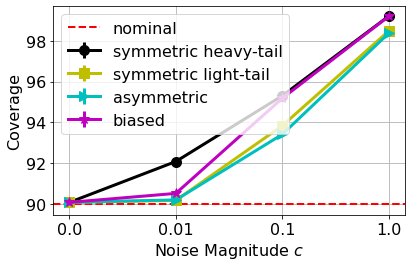

In [3]:
fig = plt.figure(figsize=([6,4]))
values = range(len(sigma_arr))
plt.errorbar(values, final_results_t_mean['coverage'], yerr=final_results_t_std['coverage'], color='k', label='symmetric heavy-tail', linewidth=3, marker='o', markersize=10)
plt.errorbar(values, final_results_gaussian_mean['coverage'], yerr=final_results_gaussian_std['coverage'], color='y', label='symmetric light-tail', linewidth=3, marker='s', markersize=10)
plt.errorbar(values, final_results_gumbel_mean['coverage'], yerr=final_results_gumbel_std['coverage'], color='c', label='asymmetric', linewidth=3, marker='>', markersize=10)
plt.errorbar(values, final_results_positive_mean['coverage'], yerr=final_results_positive_std['coverage'], color='m', label='biased', linewidth=3, marker='*', markersize=10)
plt.xticks(values, sigma_arr)
plt.axhline(y=90, label='nominal', color='r', linestyle='--', linewidth=2)
plt.xlabel(r'Noise Magnitude $c$')
plt.ylabel('Coverage')
plt.legend()
plt.grid()
fig.tight_layout()
# plt.savefig('coverage_clean_train.pdf')
plt.show()

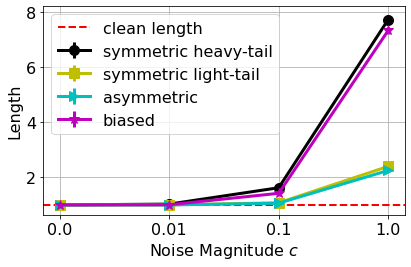

In [4]:
fig = plt.figure(figsize=([6,4]))
values = range(len(sigma_arr))
plt.errorbar(values, final_results_t_mean['length']/final_results_clean_mean['length'], yerr=final_results_t_std['length'], color='k', label='symmetric heavy-tail', linewidth=3, marker='o', markersize=10)
plt.errorbar(values, final_results_gaussian_mean['length']/final_results_clean_mean['length'], yerr=final_results_gaussian_std['length'], color='y', label='symmetric light-tail', linewidth=3, marker='s', markersize=10)
plt.errorbar(values, final_results_gumbel_mean['length']/final_results_clean_mean['length'], yerr=final_results_gumbel_std['length'], color='c', label='asymmetric', linewidth=3, marker='>', markersize=10)
plt.errorbar(values, final_results_positive_mean['length']/final_results_clean_mean['length'], yerr=final_results_positive_std['length'], color='m', label='biased', linewidth=3, marker='*', markersize=10)
plt.xticks(values, sigma_arr)
plt.axhline(y=1, label='clean length', color='r', linestyle='--', linewidth=2)
plt.xlabel(r'Noise Magnitude $c$')
plt.ylabel('Length')
plt.legend()
plt.grid()
# plt.ylim([0,9])
fig.tight_layout()
# plt.savefig('length_clean_train.pdf')
plt.show()

In [5]:
final_results_t_noisy_tr = final_results[(final_results['Noise type train']=='t')&(final_results['Noise type calib']=='t')]
final_results_t_noisy_tr_mean = final_results_t_noisy_tr.groupby('sigma').mean()
final_results_t_noisy_tr_std = final_results_t_noisy_tr.groupby('sigma').std()/np.sqrt(n)

final_results_gaussian_noisy_tr = final_results[(final_results['Noise type train']=='gaussian')&(final_results['Noise type calib']=='gaussian')]
final_results_gaussian_noisy_tr_mean = final_results_gaussian_noisy_tr.groupby('sigma').mean()
final_results_gaussian_noisy_tr_std = final_results_gaussian_noisy_tr.groupby('sigma').std()/np.sqrt(n)

final_results_gumbel_noisy_tr = final_results[(final_results['Noise type train']=='gumbel')&(final_results['Noise type calib']=='gumbel')]
final_results_gumbel_noisy_tr_mean = final_results_gumbel_noisy_tr.groupby('sigma').mean()
final_results_gumbel_noisy_tr_std = final_results_gumbel_noisy_tr.groupby('sigma').std()/np.sqrt(n)

final_results_positive_noisy_tr = final_results[(final_results['Noise type train']=='positive')&(final_results['Noise type calib']=='positive')]
final_results_positive_noisy_tr_mean = final_results_positive_noisy_tr.groupby('sigma').mean()
final_results_positive_noisy_tr_std = final_results_positive_noisy_tr.groupby('sigma').std()/np.sqrt(n)

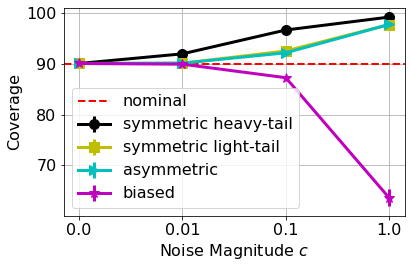

In [6]:
fig = plt.figure(figsize=([6,4]))
values = range(len(sigma_arr))
plt.errorbar(values, final_results_t_noisy_tr_mean['coverage'], yerr=final_results_t_noisy_tr_std['coverage'], color='k', label='symmetric heavy-tail', linewidth=3, marker='o', markersize=10)
plt.errorbar(values, final_results_gaussian_noisy_tr_mean['coverage'], yerr=final_results_gaussian_noisy_tr_std['coverage'], color='y', label='symmetric light-tail', linewidth=3, marker='s', markersize=10)
plt.errorbar(values, final_results_gumbel_noisy_tr_mean['coverage'], yerr=final_results_gumbel_noisy_tr_std['coverage'], color='c', label='asymmetric', linewidth=3, marker='>', markersize=10)
plt.errorbar(values, final_results_positive_noisy_tr_mean['coverage'], yerr=final_results_positive_noisy_tr_std['coverage'], color='m', label='biased', linewidth=3, marker='*', markersize=10)
plt.xticks(values, sigma_arr)
plt.axhline(y=90, label='nominal', color='r', linestyle='--', linewidth=2)
plt.xlabel(r'Noise Magnitude $c$')
plt.ylabel('Coverage')
plt.legend()
plt.grid()
fig.tight_layout()
# plt.savefig('coverage_clean_train.pdf')
plt.show()

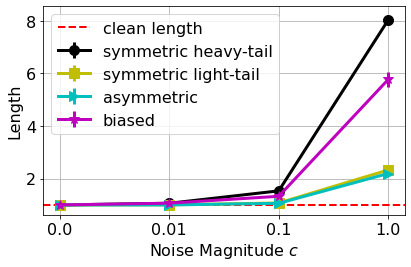

In [7]:
fig = plt.figure(figsize=([6,4]))
values = range(len(sigma_arr))
plt.errorbar(values, final_results_t_noisy_tr_mean['length']/final_results_clean_mean['length'], yerr=final_results_t_noisy_tr_std['length'], color='k', label='symmetric heavy-tail', linewidth=3, marker='o', markersize=10)
plt.errorbar(values, final_results_gaussian_noisy_tr_mean['length']/final_results_clean_mean['length'], yerr=final_results_gaussian_noisy_tr_std['length'], color='y', label='symmetric light-tail', linewidth=3, marker='s', markersize=10)
plt.errorbar(values, final_results_gumbel_noisy_tr_mean['length']/final_results_clean_mean['length'], yerr=final_results_gumbel_noisy_tr_std['length'], color='c', label='asymmetric', linewidth=3, marker='>', markersize=10)
plt.errorbar(values, final_results_positive_noisy_tr_mean['length']/final_results_clean_mean['length'], yerr=final_results_positive_noisy_tr_std['length'], color='m', label='biased', linewidth=3, marker='*', markersize=10)
plt.xticks(values, sigma_arr)
plt.axhline(y=1, label='clean length', color='r', linestyle='--', linewidth=2)
plt.xlabel(r'Noise Magnitude $c$')
plt.ylabel('Length')
plt.legend()
plt.grid()
# plt.ylim([0,9])
fig.tight_layout()
# plt.savefig('length_clean_train.pdf')
plt.show()

In [8]:
final_results_dependant_noisy_tr = final_results[(final_results['Noise type train']=='contractive')|(final_results['Noise type train']=='dispersive')]

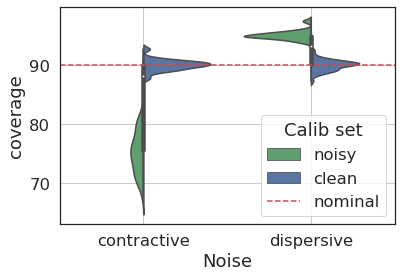

In [9]:
import seaborn as sns

sns.set(rc={'figure.figsize':(6,4)})
sns.set(font_scale=1.5, style='white')
ax = sns.violinplot(x='Noise type train', y='coverage', data=final_results_dependant_noisy_tr, split=True, hue='calib', palette={"noisy": "g", "clean": "b"})
ax.axhline(y=90, label='nominal', color='r', linestyle='--')
# ax.set_xticklabels([' '])
ax.set(xlabel='Noise')
plt.grid()
plt.legend(loc='lower right', title='Calib set')
plt.show()
fig = ax.get_figure()
fig.tight_layout()
# fig.savefig('coverage_centered.pdf')

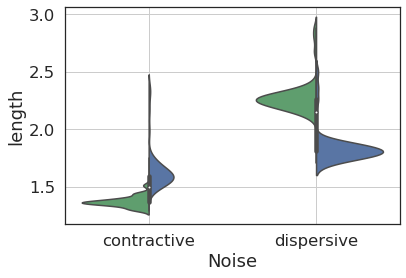

In [10]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set(font_scale=1.5, style='white')
ax = sns.violinplot(x='Noise type train', y='length', data=final_results_dependant_noisy_tr, split=True, hue='calib', palette={"noisy": "g", "clean": "b"})
ax.set(xlabel='Noise')
plt.grid()
plt.legend([],[], frameon=False)
# plt.legend(loc='upper left', title='Calib set')
plt.show()
fig = ax.get_figure()
fig.tight_layout()
# fig.savefig('length_centered.pdf')

In [11]:
final_results_clean_tr = final_results[((final_results['Noise type calib']=='contractive')|(final_results['Noise type calib']=='dispersive')|(final_results['Noise type calib']=='clean')|(final_results['Noise type calib']=='wrong_to_right'))
                                       &(final_results['Noise type train']=='clean')]

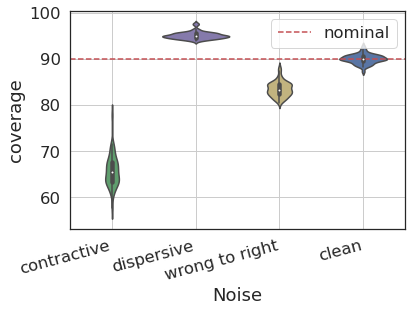

In [14]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set(font_scale=1.5, style='white')
my_pal = {"clean": "b", "contractive": "g", "wrong_to_right":'y', 'dispersive':'m'}
ax = sns.violinplot(x='Noise type calib', y='coverage', data=final_results_clean_tr, palette=my_pal)
ax.set_xticklabels(['contractive', 'dispersive', 'wrong to right', 'clean'])
ax.axhline(y=90, label='nominal', color='r', linestyle='--')
ax.set(xlabel='Noise')
plt.xticks(rotation=15, ha='right')
plt.grid()
plt.legend()
plt.show()
fig = ax.get_figure()
fig.tight_layout()
# fig.savefig('coverage_w2r.pdf')

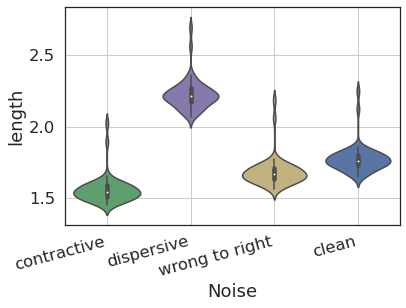

In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})
sns.set(font_scale=1.5, style='white')
ax = sns.violinplot(x='Noise type calib', y='length', data=final_results_clean_tr, palette=my_pal)
ax.set_xticklabels(['contractive', 'dispersive', 'wrong to right', 'clean'])

ax.set(xlabel='Noise')
plt.xticks(rotation=15, ha='right')
plt.grid()
plt.show()
fig = ax.get_figure()
fig.tight_layout()
# fig.savefig('length_w2r.pdf')